## Instructions

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=true).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.  

**Обратите внимание:** для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

## Review criteria
Решение должно представлять собой IPython-ноутбук, содержащий:

- код, генерирующий выборки и графики;
- краткие описания каждого блока кода, объясняющие, что он делает;
- необходимые графики (убедитесь, что на них подписаны оси);
- выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
- выводы по результатам выполнения задания.

# Задание: Центральная граничная теорема своими руками для распределения Лапласса

Для выполнения задания я решил выбрать [распределение Лапласса.](https://www.wikiwand.com/en/Laplace_distribution#/)

In [1]:
# Загрузим все необходимые библиотеки:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

### 1.Генерация выборки из распределения Лапласса объёмом 1000:

 Зададим значения параметров $\mu=0$ и $b=1$, характеризующих распределение Лапласса:

In [238]:
mu = 0.0
b = 1.0

# Зададим случайную величину из распределение Лапласса
laplace_rv = sts.laplace(loc=mu, scale=b)

# Сгенерируем 1000 значений
sample = laplace_rv.rvs(size=1000)

### 2. Построение теоретической плотности распределения Лапласса и гистограммы выборки

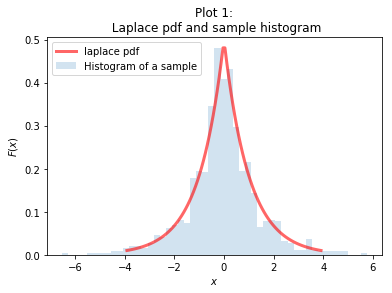

In [278]:
fig, ax = plt.subplots(1, 1)

# Построим теоретическую плотность распределения:
x = np.linspace(sts.laplace.ppf(0.01),
              sts.laplace.ppf(0.99), 100)
ax.plot(x, sts.laplace.pdf(x),
         'r-', lw=3, alpha=0.6, label='laplace pdf')

# Добавим гистограмму на этот же график
ax.hist(sample, normed=True, label='Histogram of a sample',
        bins=50, alpha=0.2)
ax.legend(loc='best')
plt.title("Plot 1:\n Laplace pdf and sample histogram")
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.show()

Как мы можем видеть на графике распределение похоже на якобы вытянутый за вершину треугольник.

### 3. Генерация 1000 выборок из распределения Лапласса объёмом n, построение гистограмм средних значений и теоретических графиков плотности нормальных распределений:

### Для распределение Лапласса:
- математическое ожидание(mean) равно $\mu$
- дисперсия: $\sigma^2 = 2b^2$
- стандартное отклонение: $\sigma = b\sqrt{2}$  
[для проверки формул перейдите по этой ссылке](https://www.wikiwand.com/en/Laplace_distribution#/)

### Параметры нормального распределения выборки размера $n$,  которыми, согласно центральной предельной теореме, приближается распределение выборочных средних из распределения Лапласса будут следующими:
- математическое ожидание остается неизменным и равно $\mu$
- дисперсия: $\bar{\sigma}^2 = \frac{2b^2}{n}$
- стандартное отклонение: $\bar{\sigma} = \frac{\sigma}{\sqrt{n}}=\frac{b\sqrt2}{\sqrt{n}}$  


### Сгенерируем выборки различного размера и построим необходимые графики:

Cтандартное отклонение выборки размера 1 равно 2.82842712475


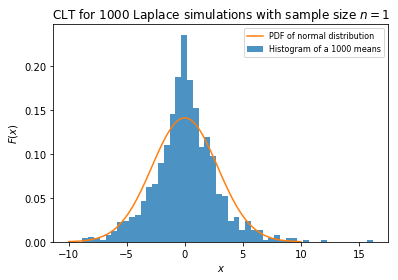

Cтандартное отклонение выборки размера 2 равно 2.0


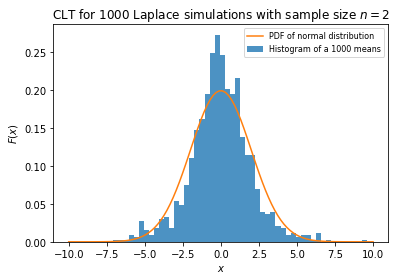

Cтандартное отклонение выборки размера 5 равно 1.26491106407


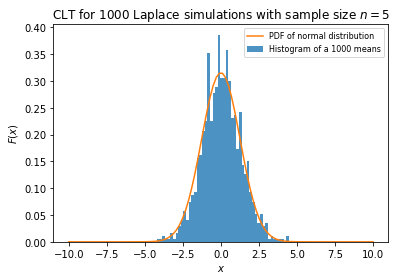

Cтандартное отклонение выборки размера 10 равно 0.894427191


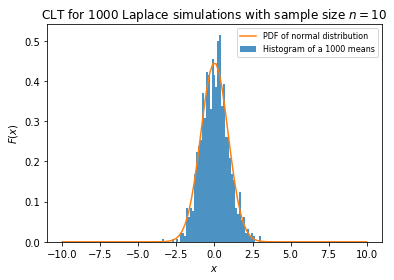

Cтандартное отклонение выборки размера 30 равно 0.516397779494


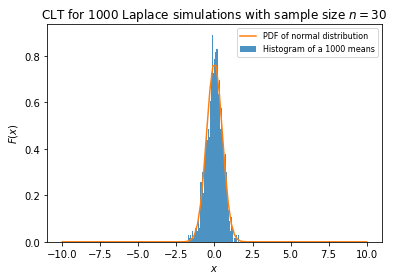

In [285]:
# Зададим значение mu и b и расчитаем sigma:
mu = 0.0
b = 2.0
sigma = b*(2**0.5)

# Задаём объём выборки n:
for n in [1, 2, 5, 10, 30]:
    
    # Создаем массив который будет хранить результаты 1000 средних:
    means = np.empty(1000)
    
    # Создадим 1000 выборок:
    for i in xrange(len(means)):
        # Создадим одну выборку размера n, с заданными параметрами mu и b
        laplace_rv = sts.laplace(loc=mu, scale=b)
        sample_1000 = laplace_rv.rvs(size=n)
        
        # посчитаем cреднее значение выборки и добавим в массив средних
        means[i] = np.mean(sample_1000)
        
        # Можно сделать и в одну строку, но так менее читаемо:
        # means[i] = np.mean(sts.laplace.rvs(loc=mu, scale=b, size=n))
        
    # построим гистограмму средних значений:
    plt.hist(means, normed=True, alpha=0.8,
             bins = 50, label='Histogram of a 1000 means')
    
    # Зададим параметры нормального распределения - математическое ожидание и стандартное отклонение 
    # для выборки размера n, используя формулы упомянутые выше
    mu_n = mu 
    sigma_n = sigma/n**0.5
    print 'Cтандартное отклонение  выборки размера {} равно {}' .format(n, sigma_n)
    
    # зададим нормально распределенную случайную величину 
    norm_rv = sts.norm(loc=mu_n, scale=sigma_n)

    # построим график плотности нормального распределения
    x = np.linspace(-10, 10, 100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label="PDF of normal distribution")
    
    plt.legend(loc='upper right', fontsize=8)
    plt.title("CLT for 1000 Laplace simulations with sample size $n=%s$" % n)
    plt.ylabel('$F(x)$')
    plt.xlabel('$x$')
    plt.show()

# 4. Выводы:
### Построив гистограммы распределений выборочных средних из распределения Лапласса, мы увидели,что чем больше размер выборки $n$, тем больше гистограмма распределений становится похожа на нормальное распределение.  
### Это и есть Центральная Предельная Теорема в действии: распределение выборочных средних, взятых из почти любого отличного от нормального распределения, стремится к нормальному распределению с увелечением размера выборки.